# <center> **Grupo más Cercano (Nearest Group)**

Inspirado en el cálculo del coeficiente de silueta, descrito acontinuación:

# Coeficiente de la Silueta.



Podemos definir el coeficiente de la silueta como:

- $a(x)$ : distancia promedio de x a todos los demás puntos en el mismo cluster.
- $b(x)$ : distancia promedio de x a todos los demás puntos en el cluster más cercano.

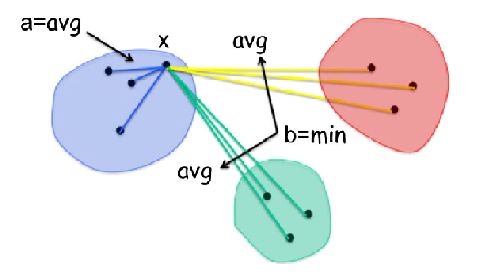



El coeficiente de silueta para $x$ se define como:

\begin{eqnarray*}
s(x) & = & \frac{b(x) - a(x)}{max\{a(x), b(x)\}}
\end{eqnarray*}

El coeficiente de la silueta para todo el agrupamiento es:

\begin{eqnarray*}
sc & = & \frac{1}{n} \sum_{i}^n s(x)
\end{eqnarray*}

Interpretación:
- Si el valor de la silueta está cerca de $1$, indica que los datos están bien agrupados.
- Si el valor de silueta está cerca de $–1$, indica que los datos están mal agrupados.
- $0$ si es indiferente.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from statistics import mode
sns.set()

In [ ]:
# NG : Nearest Group
class NG:

  def __init__(self, base, groups):
    '''
    Inputs :
      base : muestra de referencia
      groups : diccionario de muestras de comparación
    '''
    self.base = base
    self.groups = groups

    self.samples = []
    self.names = []
    for key, val in self.groups.items():
      self.samples.append(val)
      self.names.append(key)

    # especial results
    self.dist_centroides_list = None
    self.group_means = None

    # validación de la muestra base
    if isinstance(base, list):
      pass
    else:
      raise TypeError("La muestra base debe ser una lista")
    # validación de las muestras de comparación
    for sample in self.samples:
      if isinstance(sample, list):
        pass
      else:
        raise TypeError("Las muestras de comparación deben ser listas")

  # distancia euclideana
  def _euclidean_dist(self, x,y):
    dist = np.sqrt(np.sum([(a-b)**2 for a,b in zip(x,y)]))
    return dist

  # Espacio para agregar otras distancias
  # ...
  # ...

  # función para calcular el promedio de la distancia de un punto de la muestra1 vs todos los puntos de la muestra2
  def _mean_distance(self, sample_1, sample_2):
    samples = []
    # validación de muestras no vacias
    if len(sample_1) == 0:
      raise ValueError('La muestra1 no debe ser vacía')
    if len(sample_2) == 0:
      raise ValueError('La muestra1 no debe ser vacía')

    dist_mean = []
    for x1 in sample_1:
      dist = []
      for x2 in sample_2:
        dist_i = self._euclidean_dist(x1,x2)
        dist.append(dist_i)
      dist_mean.append(np.mean(dist))

    return dist_mean
  # ontiene las distancias promedio de la muestra base vs el resto
  def _min_lists(self):
    list_samples = self.samples
    list_means = []
    #list_names = [f"grupo{str(i)}"  for i in range(len(list_samples))]
    for k in range(len(list_samples)):
      g_comparacion = list_samples[k]
      dlist = self._mean_distance(self.base, g_comparacion)
      list_means.append(dlist)

    return list_means

  @property
  def centroides(self):
    list_samples = self.samples
    # ceentroide grupo referencia
    base = self.base
    centrosx = [x[0] for x in base]
    centrosy = [y[1] for y in base]
    base_centroidex = np.mean(centrosx)
    base_centroidey = np.mean(centrosy)
    base_centroide = [base_centroidex, base_centroidey]
    # centroide de muestras
    sample_centroides = []
    for sample in list_samples:
      sample_centrosx = [x[0] for x in sample]
      sample_centrosy = [y[1] for y in sample]
      sample_centroidex = np.mean(sample_centrosx)
      sample_centroidey = np.mean(sample_centrosy)
      sample_centroides.append([sample_centroidex, sample_centroidey])
    # cálculo de la distancia a los centroides
    dist_centroides_list = []
    for sample_centroide in sample_centroides:
      dist = self._euclidean_dist(base_centroide, sample_centroide)
      dist_centroides_list.append(dist)
    self.dist_centroides_list = dist_centroides_list

    return round(self.dist_centroides_list)


  # obtiene el indice de la distancia mínima promedio
  def min_distance(self):
    #global list_means
    list_index = []
    list_means = self._min_lists()
    for i in range(len(list_means[0])):
      result = pd.Series(np.array(list_means)[:,1].tolist()).idxmin()
      list_index.append(result)

    return [val+1 for val in list_index]

  @property
  def mean_groups(self):
    list_means = self._min_lists()
    group_means = [np.mean(x) for x in list_means]
    self.group_means = group_means

    return round(self.group_mea,4)

  def summary(self):
    head = f" {'-'*120}- \n -{' '*54} Summary {' '*55} -\n {'-'*120}- \n "
    body = f"The nearest group is: \t \t \t {self.names[mode(self.min_distance())-1]} \n The distance to centroids are: \t {self.centroides} \n The distance means are: \t \t {self.mean_groups} \n"
    pie = f" {'-'*120}- \n "

    return head + body + pie


# **Ejemplo 1: Datos sintéticos con 2 grupos**

Primero generamos un conjunto de datos con la función make_blobs, comenzamos con **3 grupos**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_classification, make_blobs

random.seed(23456798)

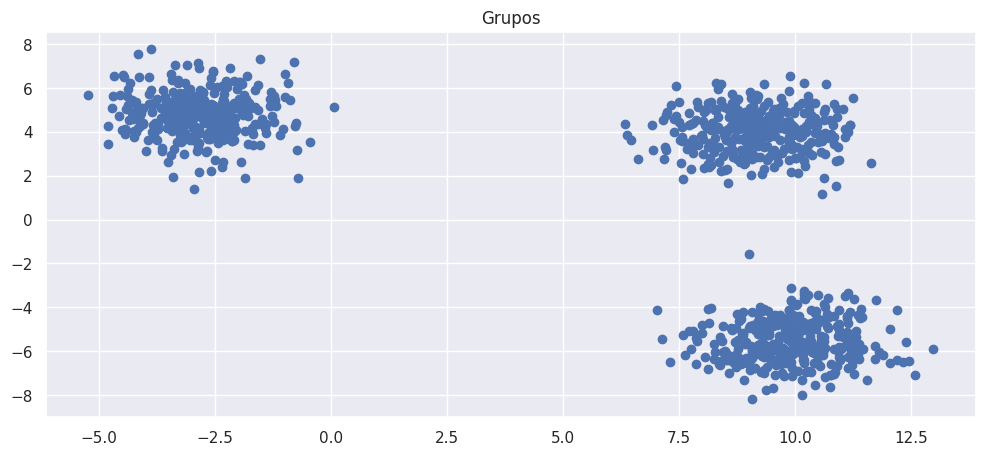

In [ ]:
X, y = make_blobs(n_samples=1000,centers=3, random_state=24)
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12,5))
plt.title('Grupos')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Para separar el conjunto de datos por cada grupos, empleamos el algoritmo de k-means con $k=3$ para realizar dicha tarea.

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2]


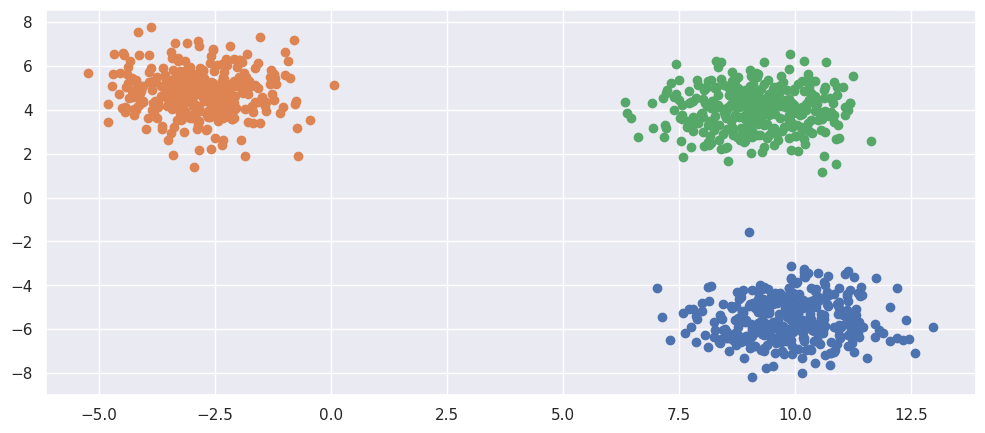

In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(X)
# retorna las etiquetas
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,5))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

Ahora formamos un dataframe con los datos generados y con la etiqueta del cluster correspondiente.

In [ ]:
# base
base = pd.DataFrame(X).rename({0:'Lat',1:'Lon'}, axis=1)
base['cluster'] = y_clusters
base.head()

,Lat,Lon,cluster
0,12.186056,-6.406788,0
1,9.071831,4.831947,2
2,-2.821501,5.922762,1
3,-2.583698,2.221535,1
4,10.166050,-4.839129,0


Separamos el dataframe formado por cada grupo correspondiente, y graficamos.

In [ ]:
sample1 = base[base['cluster'] == 0].drop('cluster', axis=1).reset_index(drop=True)
sample2 = base[base['cluster'] == 1].drop('cluster', axis=1).reset_index(drop=True)
sample3 = base[base['cluster'] == 2].drop('cluster', axis=1).reset_index(drop=True)

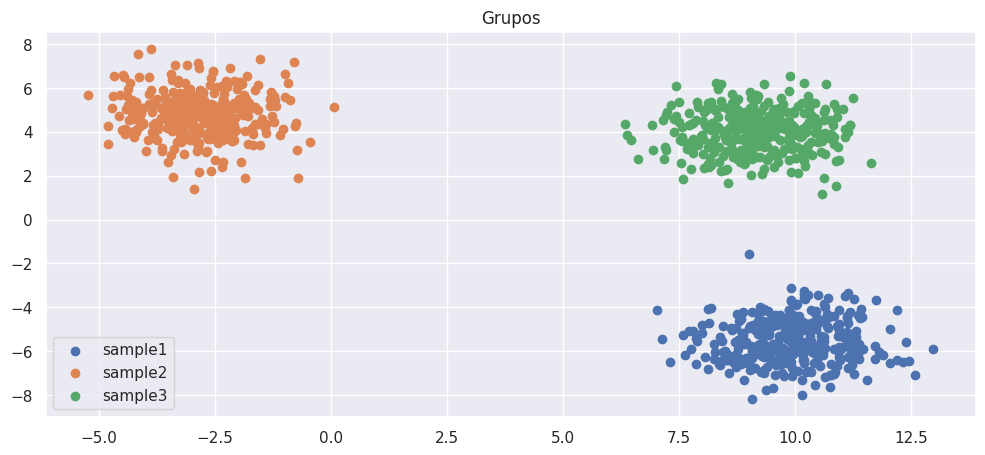

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(sample1['Lat'], sample1['Lon'], label='sample1')
plt.scatter(sample2['Lat'], sample2['Lon'], label='sample2')
plt.scatter(sample3['Lat'], sample3['Lon'], label='sample3')
plt.title('Grupos')
plt.legend()
plt.show()

Finalmente, para aplicar el algoritmo, por cada observación de cada muestra generamos tuplas (lat, y lon).

In [ ]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['Lat'], sample1['Lon'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['Lat'], sample2['Lon'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['Lat'], sample3['Lon'])]

y aplicamos el algorítmo

In [ ]:
# valores
base = samp1
grupos = {'sample1': samp2,
          'sample2':samp3}

# ejecutamos
nearest_group = NG(base, grupos)
print(nearest_group.summary())
#print(nearest_group.mean_groups)
#print(nearest_group.centroides)
#print(nearest_group.dist_centroides_list)

 ------------------------------------------------------------------------------------------------------------------------- 
 -                                                       Summary                                                         -
 ------------------------------------------------------------------------------------------------------------------------- 
 The nearest group is: 	 	 	 sample2 
 The distance to centroids are: 	 [14.260527956978278, 13.9058514801323] 
 The distance means are: 	 	 [14.407845249558893, 13.980945098158427] 
 ------------------------------------------------------------------------------------------------------------------------- 
 


# **Ejemplo 2: Datos sintéticos 3 grupos**

Primero generamos un conjunto de datos con la función make_blobs, comenzamos con **3 grupos**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_classification, make_blobs

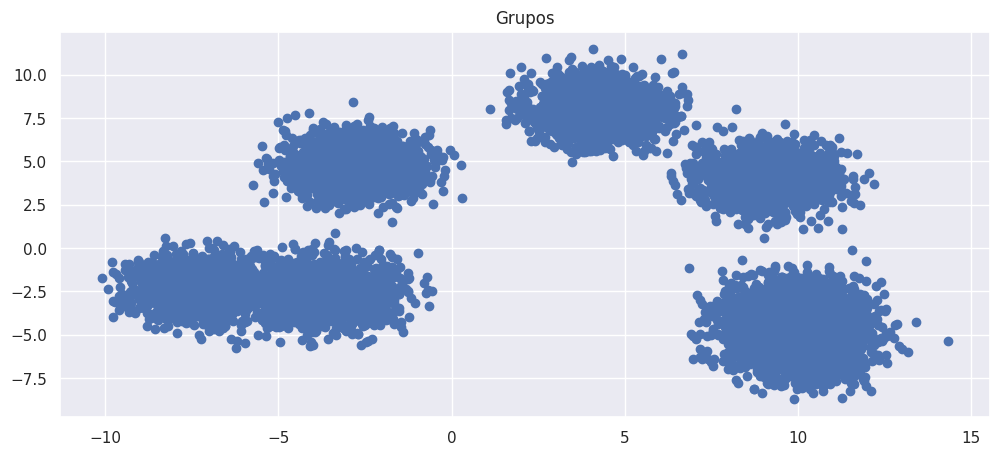

In [ ]:
X, y = make_blobs(n_samples=10000,centers=7, random_state=24)
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12,5))
plt.title('Grupos')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Para separar el conjunto de datos por cada grupos, empleamos el algoritmo de k-means con $k=3$ para realizar dicha tarea.

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 2 3 4]


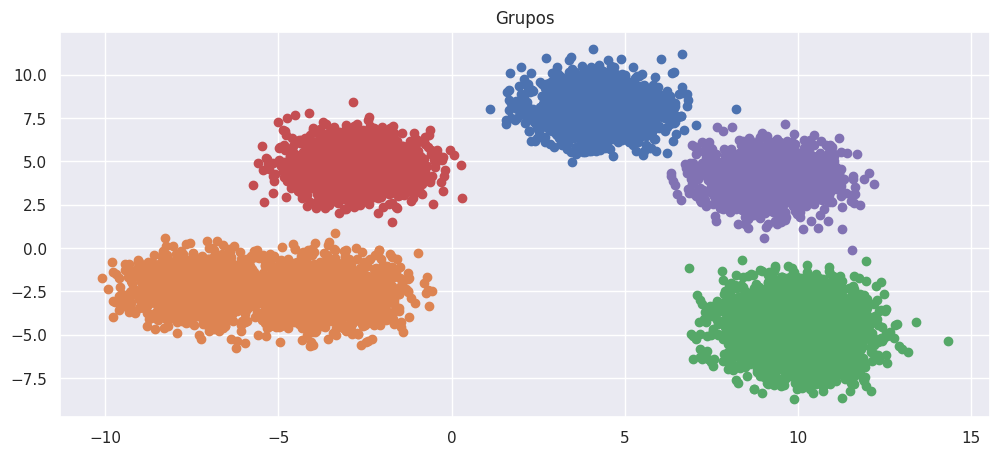

In [ ]:
modelo = KMeans(n_clusters=5)

modelo.fit(X)
# retorna las etiquetas
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,5))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])
plt.title('Grupos')
plt.show()

Ahora formamos un dataframe con los datos generados y con la etiqueta del cluster correspondiente.

In [ ]:
# base
base = pd.DataFrame(X).rename({0:'Lat',1:'Lon'}, axis=1)
base['cluster'] = y_clusters
base.head()

,Lat,Lon,cluster
0,10.322322,-4.473697,2
1,-2.935867,4.018332,3
2,9.222096,-4.105599,2
3,10.032734,-4.518039,2
4,-3.269070,5.444436,3


Separamos el dataframe formado por cada grupo correspondiente, y graficamos.

In [ ]:
sample1 = base[base['cluster'] == 0].drop('cluster', axis=1).reset_index(drop=True)
sample2 = base[base['cluster'] == 1].drop('cluster', axis=1).reset_index(drop=True)
sample3 = base[base['cluster'] == 2].drop('cluster', axis=1).reset_index(drop=True)
sample4 = base[base['cluster'] == 3].drop('cluster', axis=1).reset_index(drop=True)
sample5 = base[base['cluster'] == 4].drop('cluster', axis=1).reset_index(drop=True)

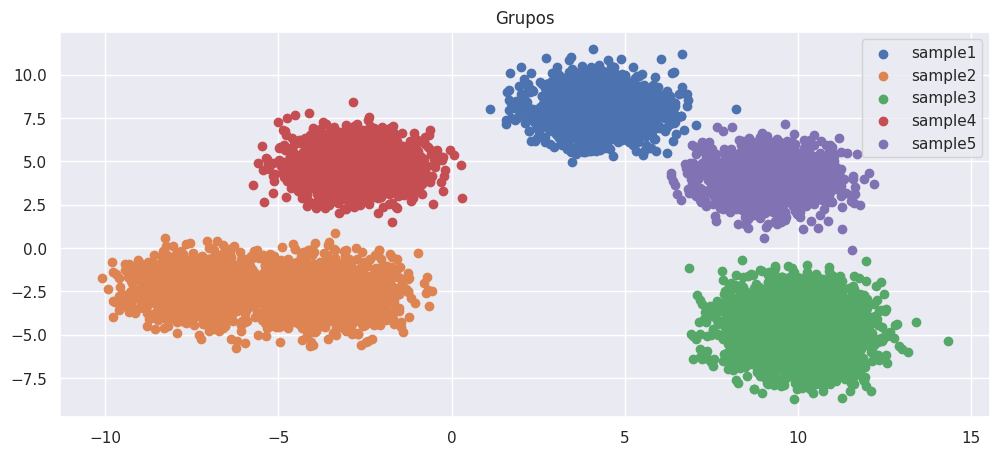

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(sample1['Lat'], sample1['Lon'], label='sample1')
plt.scatter(sample2['Lat'], sample2['Lon'], label='sample2')
plt.scatter(sample3['Lat'], sample3['Lon'], label='sample3')
plt.scatter(sample4['Lat'], sample4['Lon'], label='sample4')
plt.scatter(sample5['Lat'], sample5['Lon'], label='sample5')
plt.title('Grupos')
plt.legend()
plt.show()

Finalmente, para aplicar el algoritmo, por cada observación de cada muestra generamos tuplas (lat, y lon).

In [ ]:
samp1 = [[val1, val2] for val1, val2 in zip(sample1['Lat'], sample1['Lon'])]
samp2 = [[val1, val2] for val1, val2 in zip(sample2['Lat'], sample2['Lon'])]
samp3 = [[val1, val2] for val1, val2 in zip(sample3['Lat'], sample3['Lon'])]
samp4 = [[val1, val2] for val1, val2 in zip(sample4['Lat'], sample4['Lon'])]
samp5 = [[val1, val2] for val1, val2 in zip(sample5['Lat'], sample5['Lon'])]

y aplicamos el algorítmo

In [ ]:
# muestra base
base = samp4
# muestras de comparación
grupos = {'sample1':samp5,
          'sample2':samp1,
          'sample3':samp3,
          'sample4':samp2}

# ejecutamos
nearest_group = NG(base, grupos)
print(nearest_group.summary())

 --------------------------------------------------------------------------------- 
 -                                   Summary                                     -
 --------------------------------------------------------------------------------- 
 The nearest group is: 	 	 	 sample2 
 The distance to centroids are: 	 [11.975762408560469, 7.733472509669229, 15.879451178007972, 7.741359904718994] 
 The distance means are: 	 	 [12.057252863350532, 7.866510596545735, 15.95643184240128, 8.069365338333721] 
 --------------------------------------------------------------------------------- 
 


Podemos acceder a la tabla del promedio de la distancia de una observación de la base de referencia vs las muestras de comparación.

In [ ]:
# distancias promedio
g_comparacion = pd.DataFrame(nearest_group._min_lists()).T
g_comparacion.columns = [*grupos.keys()]
g_comparacion.head()

,sample1,sample2,sample3,sample4
0,12.121749,8.269742,15.582960,7.253384
1,12.535860,7.994624,16.681611,8.471815
2,10.993086,6.908951,15.091179,8.351569
3,12.356792,8.649396,15.575694,6.848728
4,13.109228,9.364201,16.143654,6.523837


Podemos observar que para la primera observación la muestra2(sample2) tiene el menor promedio de las cuatro muestras, lo cual significa que está más próxima a la base de referencia.